In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [31]:
import sympy as sp

In [13]:
def get_hss(A0, S, theta):
    def rhs(X):
        u, v = X
        mod2 = u ** 2 + v ** 2
        return np.array([
            S - u + theta * v - v * mod2,
            u * mod2 - v - theta * u
        ])
    def jac(X):
        u, v = X
        mod2 = u ** 2 + v ** 2
        return np.array([
            [-1 - 2 * u * v, theta - 3 * v ** 2 - u ** 2],
            [-theta + 3 * u ** 2 + v ** 2, 2 * u * v - 1]
        ])
    X0 = np.array([A0.real, A0.imag])
    X = fsolve(rhs, X0, fprime=jac)
    return X[0] + 1j * X[1]

def get_S2_from_I(I, theta):
    return I * (1 + (theta - I) ** 2)

def get_saddle_node(theta):
    delta = np.sqrt(theta * theta - 3) / 3
    SN = 2 * theta / 3 + np.array([delta, -delta])
    return SN

In [88]:
theta = 2.5
Ss = np.linspace(1.0, 1.9, 201)
A0s = np.zeros(len(Ss), dtype=complex)
A0s[0] = get_hss(0.4 + 0.4j, Ss[0], theta)

for i, S in enumerate(Ss[1:]):
    A0s[i+1] = get_hss(A0s[i], S, theta)

c:\Users\marti\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


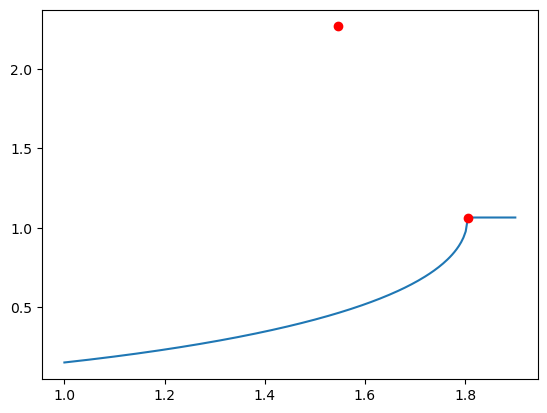

In [89]:
plt.plot(Ss, np.abs(A0s) ** 2)
I = get_saddle_node(theta)
S = np.sqrt(get_S2_from_I(I, theta))

plt.plot(S, I, 'ro')

In [90]:
S

array([1.54598594, 1.80501402])

In [116]:
def get_growth_rate(u0, v0, theta):
    q = sp.symbols('q')
    M = sp.Matrix([
        [1 - 2 * u0 * v0, theta + q - 3 * v0 ** 2 - u0 ** 2], 
        [- theta + 3 * u0 ** 2 + v0 ** 2 - q, 2 * u0 * v0 - 1]
    ])
    eigvals = M.eigenvals()
    return list(eigvals.keys())


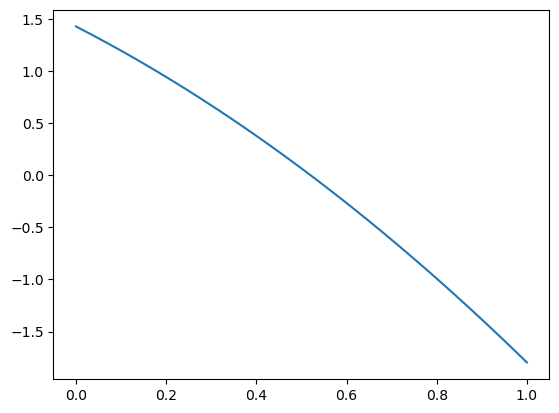

In [123]:
i_instability = 0
i = 160
u0, v0 = A0s[i].real, A0s[i].imag
sigma = get_growth_rate(u0, v0, theta)[0]
ks = np.linspace(0, 1, 1000)
sigmas_func = sp.lambdify(sp.symbols('q'), sigma * sigma)
plt.plot(ks, sigmas_func(ks))
plt.show()
# sigma

In [93]:
Ss[i_instability]


1.603